<a href="https://colab.research.google.com/github/ucfilho/Doubts_Students/blob/master/etanol_ANN_dez_21_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
from google.colab import files
%matplotlib inline

In [2]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [3]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [4]:
# funcao retorna os dados a forma original
def RespEnd(x,x_old):
    strings=list(x_old)
    k = 0
    for i in strings:
      max_x=x_old[i].max()
      min_x=x_old[i].min()
      a=(max_x+min_x)/2
      b=(max_x-min_x)/2
      x[0,k]=x[0,k]*b+a
      k = k+1
    return x

In [5]:
uploaded = files.upload()

Saving sorgopontanegra.csv to sorgopontanegra (23).csv


In [6]:
DAT=pd.read_csv("sorgopontanegra.csv")
print(DAT.head())

   Run       SO    IN       GL       Et       Fi       PD        ST         Y1
0    1   35.000  15.0  22.0752  39.9938  27.9171  55.5470   27.0752  79.826230
1    2   35.000  45.0  22.7325  47.5129  31.0542  65.9902   25.7325  99.782441
2    3  165.000  15.0  79.9777  33.2913  45.5551  46.2379   99.9777  84.833595
3    4  165.000  45.0  80.0889  39.5216  48.9236  54.8911  102.0889  98.627059
4    5   25.445  30.0  16.1789  47.5580  30.0440  66.0528   19.1789  97.422376


In [7]:
rows, cols =DAT.shape

In [8]:
# separa as colunas de interesse
Index=range(1,cols)
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

        SO    IN       GL       Et       Fi       PD        ST         Y1
0   35.000  15.0  22.0752  39.9938  27.9171  55.5470   27.0752  79.826230
1   35.000  45.0  22.7325  47.5129  31.0542  65.9902   25.7325  99.782441
2  165.000  15.0  79.9777  33.2913  45.5551  46.2379   99.9777  84.833595
3  165.000  45.0  80.0889  39.5216  48.9236  54.8911  102.0889  98.627059
4   25.445  30.0  16.1789  47.5580  30.0440  66.0528   19.1789  97.422376


In [9]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [10]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
print(train.head())
Col_Indep=['SO','IN']
print(test.head())
print("=======================")
print(test.shape[0])
print(test.shape[1])
print(train.shape[0])
print(train.shape[1])
print("=======================")

         SO        IN        GL        Et        Fi        PD        ST  \
4 -1.000000  0.049724 -1.000000  0.768674 -0.797501  0.768674 -0.988221   
0 -0.871792 -0.779006 -0.873338 -0.165149 -1.000000 -0.165146 -0.813981   
5  1.000000  0.049724  1.000000 -0.935138  0.718002 -0.935140  1.000000   
8  0.000369  0.049724 -0.188415 -0.796821  0.602066 -0.796824 -0.097843   
9  0.000369  0.049724 -0.140169 -0.817351  0.415657 -0.817357 -0.048285   

         Y1  
4 -0.648595  
0 -0.987389  
5 -0.921917  
8 -0.782619  
9 -0.853944  
          SO        IN        GL        Et        Fi        PD        ST  \
6   0.000369 -0.900552 -0.277572 -1.000000  0.309109 -1.000000  0.018657   
10  0.000369  0.049724 -0.205310 -0.842067  0.553567 -0.842058 -0.115198   
11 -0.871792  0.878453 -0.841784  1.000000 -0.789180  1.000000 -0.819081   

          Y1  
6  -1.000000  
10 -0.777842  
11  0.780338  
3
8
10
8


In [11]:
# obtem as variaveis independentes (treino e teste)
x_train=train[Col_Indep]
x_test=test[Col_Indep]
X_OLD=DAT_OLD[Col_Indep]

In [12]:
# obtem as variaveis dependentes (treino e teste)
Index=[ 'Et']
y_train=train[Index]
y_test=test[Index]
Y_OLD=DAT_OLD[Index]

In [13]:
# define a rede neural 
N_Hidden= 10
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)

In [14]:
# treina a rede neural
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=10,
             random_state=1, solver='lbfgs')

In [15]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)
#print(y_calc_train)
#print(Y_OLD)

In [16]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [17]:
#Y_OLD

In [18]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
y_test=Original(y_test,Y_OLD)
y_train=Original(y_train,Y_OLD)
#print(y_calc_train)
#print(y_test)
#print(y_calc_test)
#print(Y_OLD)

<ipython-input-3-fd87f8b8b3de>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i]=x[i]*b+a


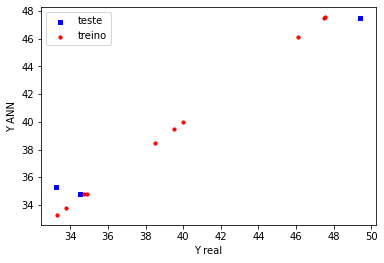

In [19]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test.values,y_calc_test.values, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train.values,y_calc_train.values, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Y ANN')
plt.xlabel('Y real')
plt.show()

In [20]:
r2_test= r2_score(y_test.values,y_calc_test.values)
r2_train = r2_score(y_train.values,y_calc_train.values)
print('r2 (train)=',r2_train)
print('r2 (test)=',r2_test)

r2 (train)= 0.9999518226846905
r2 (test)= 0.9503991900684671


In [21]:
def function(x, clf=clf):
  n = len(x)
  x=x.reshape((1, n))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [22]:
nrows,ncols= x_train.shape
bounds = [(-1,1)]*ncols
OLD=Y_OLD
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was

In [23]:
n = len(bounds)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, n))
#print(Condicoes)

In [24]:
x = np.array(Condicoes)
df = pd.DataFrame(RespEnd(x,X_OLD),columns=Col_Indep)
df

,SO,IN
0,25.445,47.2


In [25]:
#X_OLD

In [26]:
DAT_OLD

,SO,IN,GL,Et,Fi,PD,ST,Y1
0,35.000,15.0,22.0752,39.9938,27.9171,55.547000,27.0752,79.826230
1,35.000,45.0,22.7325,47.5129,31.0542,65.990200,25.7325,99.782441
2,165.000,15.0,79.9777,33.2913,45.5551,46.237900,99.9777,84.833595
3,165.000,45.0,80.0889,39.5216,48.9236,54.891100,102.0889,98.627059
4,25.445,30.0,16.1789,47.5580,30.0440,66.052800,19.1789,97.422376
5,174.500,30.0,109.2821,33.7567,45.9617,46.884300,109.2821,83.226676
6,100.000,12.8,49.8091,33.2313,41.6670,46.154600,64.8091,79.171252
7,100.000,47.2,55.3959,38.5110,43.7050,53.487500,59.9659,99.160074
8,100.000,30.0,53.9595,34.8771,44.7440,48.440400,59.5295,90.461489
9,100.000,30.0,56.2054,34.7108,42.7861,48.209400,61.7754,86.757060
